# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports at the start of your programs:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft

# Introduction

One of the most important concepts in the analysis of signals is the _Fourier transform_:

$$
X(f)=\int_{-\infty}^{\infty} x(t)\,e^{-i2\pi ft}\,dt
\label{eq:1}
\tag{1}
$$

which gives the component $X(f)$ at a frequency $f$ of any signal $x(t)$. So if $x(t)$ corresponds to a sound, then $X(f)$ are the frequency components of the sound.
Of course, the original signal can be written in terms of the frequency components again:

$$
x(t)=\int_{-\infty}^{\infty} X(f)\,e^{i2\pi ft}\,df
\label{eq:2}
\tag{2}
$$

The proof of the above pair of equations, called a Fourier transform pair, is something that you will see elsewhere, such as PX2232 Optics.
An equivalent way you will often see of writing the Fourier pair is to use angular frequency $\omega = 2\pi\,f$ instead, so that $df = d\omega/2\pi$. Then the above equations can be expressed:

$$
\begin{aligned}
X(\omega) &= \int_{-\infty}^{\infty} x(t)\,e^{-i\omega t}\,dt \\
x(t) &= \frac{1}{2\pi}\int_{-\infty}^{\infty} X(\omega)\,e^{i\omega t}\,d\omega
\end{aligned}
\label{eq:3}
\tag{3}
$$

(Sometimes this pair is defined so that $1/\sqrt{2\pi}$ is the prefactor in each equation instead of $1$ and $1/2\pi$, but it’s still the same idea.) We’ll use the first two equations, expressed using ordinary frequency $f$, from now on.
In general, both the functions $x(t)$ and $X(f)$ are complex.

![Figure 1](https://raw.githubusercontent.com/PX2134/images/master/week10/figure1.png)

Figure 1: Representation of the Fourier transform as a linear projection operation.


## Real data

Although the above equations work even for $x(t)$ complex, most often we deal with real data (such as displacement of position for a wave on a string). Expanding the real and imaginary parts of the first equation (Eq. [1](#mjx-eqn-eq:1)) it is simple to see that, if $x(t)$ is real, then

$$
X(-f) = X^*(f)
\label{eq:4}
\tag{4}
$$

Thus if we express $X(f)$ in terms of its real and imaginary parts, $X(f) = X_r(f)+iX_i(f)$, we have:

$$
\begin{aligned}
X_r(-f) &= X_r(f) \\
X_i(-f) &= -X_i(f)
\end{aligned}
\label{eq:5}
\tag{5}
$$

Proof: expand the exponential:

$$
e^{-i2\pi ft} = \cos(2\pi ft) - i \sin( 2\pi ft)
\label{eq:6}
\tag{6}
$$

so that the real and imaginary parts of equation (Eq. [1](#mjx-eqn-eq:1)) can be written

$$
\begin{aligned}
X_r(f) &= \int_{-\infty}^{\infty} x(t)\cos(2\pi ft) dt \\
X_i(f) &= -\int_{-\infty}^{\infty} x(t)\sin( 2\pi ft) dt
\end{aligned}
\label{eq:7}
\tag{7}
$$

The first integral is even in $f$ and the second is odd.

This means that we don’t usually bother to plot the negative frequency components when
transforming real data, since we know what they must be.

## Interpretation of the transform

Since the function $X(f)$ is in general complex (even if $x(t)$ is real) we wrote it above as $X(f)= X_r(f)+iX_i(f)$. Physically what does this mean? How can we have complex frequency components? We write the equation (Eq. [2](#mjx-eqn-eq:2)) out using $X_r$ and $X_i$ to give:

$$
\begin{aligned}
x(t) &= \int_{-\infty}^{\infty} X(f)\,e^{i2\pi ft}\,df = \int_{-\infty}^{\infty} \left[ Xr(f)+iXi(f) \right] e^{i2\pi ft}\,df \\
 &= \int_{-\infty}^{\infty} X_r(f) \cos(2\pi ft)\,df - \int_{-\infty}^{\infty} X_i(f) \sin(2\pi ft)\,df
\end{aligned}
\label{eq:8}
\tag{8}
$$

(the two imaginary terms vanish by equation (Eq. [5](#mjx-eqn-eq:5)), as they should since $x(t)$ is real). So the Fourier transform consists of an expansion in terms of cosine and sine waves: this is required because the _phase_ of the signal as well as its _amplitude_ must be allowed for.

Alternatively (and the most common way) we can write $X = \mid X \mid e^{i\theta}$ to give

$$
x(t)= \int_{-\infty}^{\infty} \mid X(f) \mid e^{i(2\pi ft+\theta)} df
\label{eq:9}
\tag{9}
$$

By equation (Eq. [4](#mjx-eqn-eq:4)) clearly

$$
\begin{aligned}
\mid X(-f) \mid &= \mid X(f) \mid \\
\theta(-f) &= -\theta(f)
\end{aligned}
\label{eq:10}
\tag{10}
$$

Usually we present the Fourier transform in this way, and plot just $\mid X(f)\mid$ for just positive frequencies if transforming real signals. This is illustrated in figure 2(a).

## Real, sampled data

The Fourier transform (FT) equation (Eq. [1](#mjx-eqn-eq:1)) can be evaluated on a computer, and there are routines available in numpy to do so. Numerically, the data corresponding to $x(t)$ will be given as a series of points, not continuous values. So in practice we must transform _sampled_ data stored as an array $[x_0,x_1,x_2...]$ of points, taken at equal time intervals $\Delta t$ apart. (This is what we usually get from an experiment.)

A consequence of this sampling is that the FT is periodic, meaning that $X(f)$ repeats in ‘frequency space’ at the sampling rate $F_s = 1/\Delta t$. See figure 2(b). (The reason for this repetition is discussed later in PX2232, but is proved by multiplying $x(t)$ in equation (Eq. [1](#mjx-eqn-eq:1)) by a periodic series of Dirac delta functions, then Fourier transforming.)

It follows, very importantly, that we must sample a signal at a fast enough rate to ensure that we cover a large enough frequency range to examine our signal. It’s not just that we would miss out on the higher frequency components that might be of interest - if higher frequencies are present in the pre-sampled signal, they actually appear in the transformed signal in the wrong place: this is known as _aliasing_. (In experiments, data is usually sampled after the signal goes through an analog _anti-aliasing filter_ to remove these higher frequencies.)

## Real, finite data range

In a computer implementation of the Fourier transform equations, we can have only a finite range of data, i.e. covering a finite time interval $\tau$, as illustrated in figure 2(c). This has the effect of broadening otherwise infinitely sharp peaks, unless $\tau$ happens to match exactly the period of the underlying signal(s). (The reason for this is again discussed in PX2232. The proof is based on multiplying $x(t)$ in equation (Eq. [1](#mjx-eqn-eq:1)) by a top-hat function, and considering a ‘convolution’ in frequency space.)

Since we furthermore have sampled data, there will be a fixed number $N$ of points in this time interval. The effect on the transform is shown in figure 2(d).

## Real, periodic data

Since the data we possess must be recorded over a finite time window $\tau$, we in fact can assume anything we like for the data outside this time interval (The Fourier transform components will still represent the known signal in the finite window exactly). The maths becomes far simpler if let the $x$ data itself repeat periodically outside this window, since this results in a Fourier _series_. In other words, only certain discrete frequencies are needed to represent the original signal if we use this assumption. The frequencies are all multiples of the $1/\tau$, so the point separation in frequency space is $\Delta f = 1/\tau$. This is also illustrated, in figure 2(e).

## The discrete Fourier transform

In the actual computer implementation, we take $N$ sampled points, at sampling rate $F_s = 1/\Delta t$, and the data is taken as repeating with period $\tau = N\Delta t$. This results in a discrete Fourier transform or DFT, illustrated in figure 2(f), with $N$ points repeating with frequency $F_s$.

**Note**: the interval between frequency points is $\Delta f = F_s/N = 1/N\Delta t = 1/\tau$ as expected.

Some years ago (in 1965 by J. Cooley and J. Tukey) it was discovered that the DFT could be sped up hugely by clever programming; this implementation, called the fast Fourier transform or FFT, is almost always employed in Fourier transforming data.

![Figure 2](https://raw.githubusercontent.com/PX2134/images/master/week10/figure2.png)

Figure 2: Figure after http://dx.doi.org/10.1119/1.10128 (a) Continuous cosine data $x(t)$ of infinite extent at a single frequency $f_0$, and its transform. (b) Sampled data and resulting periodicity (or _Nyquist aliases_). (c) Continuous data in a finite window broadens the FT peaks. (d) Sampling the data of (c) results in Nyquist aliases, thus combining (b) and (c). (e) Periodically continued wave form and resulting _discrete_ Fourier _series_. (f) sampled data in a finite window, with periodic continuation assumed; the resulting spectrum obtained is a discrete Fourier transform and is a sample of the spectrum in (d).



Mathematically, the DFT pair normally used is (where $k, n = 0, . . . , N - 1$)

$$
\begin{aligned}
X_k &= \sum_{n=0}^{N-1} x_n e^{-i2\pi nk/N} \\
x_n &= \frac{1}{N}\sum_{k=0}^{N-1} X_k e^{i2\pi kn/N}
\end{aligned}
\label{eq:11}
\tag{11}
$$

## Summary

To help clarify all this, figure 2 is a useful summary. The Fourier transform algorithms you will find implemented in the computer are almost always an FFT, shown in figure 2(f).

The important key points to recall are:

 1. the FFT operates on a set of $N$ data points with sample rate $F_s$ (so the time separation is $\Delta t = 1/F_s$).
 2. The transform consists of N data points covering the frequency range $F_s$ (so the frequency separation is $\Delta f = F_s/N$).
 3. Both the original $x$ points and the transformed $X$ points are periodically repeated.

The DFT or FFT is a good representation of the ‘true’ ordinary FT when the sampling rate is fast enough (so that high frequencies are not aliased) and the data length is large enough (so that the frequency resolution is high).

# Implementation

## Complex numbers

In python, the complex number $i$ is written `j`, e.g.:

In [3]:
a=2.0+3.0j
b=-0.4+0.2j

You can use standard operations with those numbers, and access complex-number-specific methods:

In [4]:
print(a+b) # addition
print(a*b) # multiplication
print(np.real(a)) # the real part via the "function"
print(a.real) # the real part via the "method"
print(b.imag) # imaginary part
print(np.abs(a)) # absolute value (or modulus or magnitude)
print(np.angle(b)) #argument (in many applications referred to as the "phase")

(1.6+3.2j)
(-1.4000000000000001-0.8000000000000002j)
2.0
2.0
0.2
3.6055512754639896
2.677945044588987


## FFT

There are several FFT [algorithms](http://docs.scipy.org/doc/numpy/reference/routines.fft.html) which are simple to use. We’ll just use fft and ifft. First set up a data array to test out the method:

[0.    0.625 1.25  1.875 2.5   3.125 3.75  4.375 5.    5.625 6.25  6.875
 7.5   8.125 8.75  9.375]


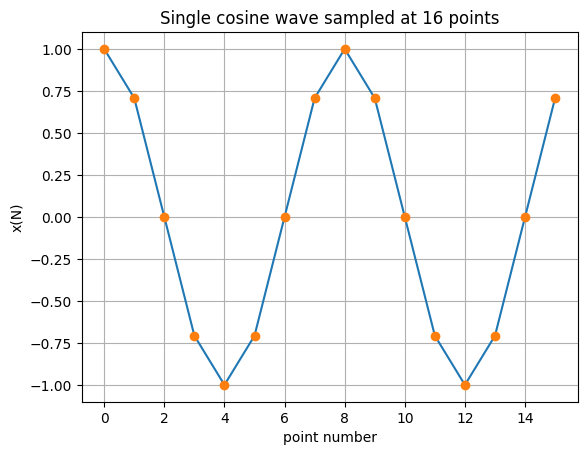

In [5]:
# Examine a small number of points to see what happens more easily
N=16 # the fft algorithm is fastest for N a power of 2
tau = 10.0 # time length
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds
# Choose endpoint False so that signal would fit exactly periodically within tau
print(t)
#
f = 0.2 # frequency in Hz
x = np.cos(2*np.pi*f*t) # create x array, amplitude 1.0
plt.plot(x)
plt.plot(x, 'o') # show as points and line
# Note how the plot is exactly periodic

plt.title('Single cosine wave sampled at {} points'.format(N))
plt.xlabel('point number')
plt.ylabel('x(N)')
plt.grid()

This sets up a cosine wave of just 16 points, so it looks a bit rough when plotted out, but it helps us to see better what happens when we look at the FFT. Use this code snippet to do the FFT:

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-4162695636.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mid X(N)\mid$')


[ 1.24474906e-17+0.00000000e+00j -7.82453173e-17+6.09960263e-17j
  5.00000000e-01-1.59363119e-16j  1.32271076e-17-7.03290092e-17j
  1.53080850e-17-2.77555756e-17j  3.00706952e-17-7.03290092e-17j
  8.32667268e-17-3.68984387e-17j  3.49475145e-17+6.09960263e-17j
 -4.30636606e-17+0.00000000e+00j  3.49475145e-17-6.09960263e-17j
  8.32667268e-17+3.68984387e-17j  3.00706952e-17+7.03290092e-17j
  1.53080850e-17+2.77555756e-17j  1.32271076e-17+7.03290092e-17j
  5.00000000e-01+1.59363119e-16j -7.82453173e-17-6.09960263e-17j]


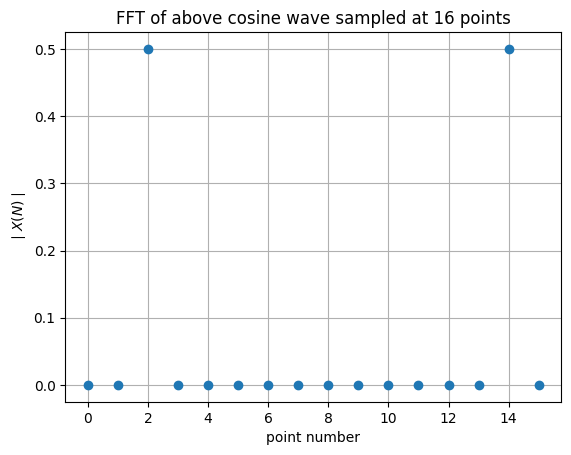

In [6]:
X = fft(x)/N # fft and normalise
plt.plot(np.abs(X),'o')
plt.title('FFT of above cosine wave sampled at '+str(N)+' points')
plt.xlabel('point number')
plt.ylabel('$\mid X(N)\mid$')
plt.grid()
print(X)

Two things to notice:

 1. Point 0 is the zero frequency component, points 1 to 8 are the positive frequency components, points 9 to 15 are the negative frequency components. To put the latter in the ‘correct’ position we can reorder them, so that point 15 appears effectively in the -1 position, point 14 in the -2 position, and so on (since the FT is periodic with period $F_s$, there isn’t really a ‘correct’ interval any more. The algorithm returns the interval $0$ to $F_s$, but you might prefer $-F_s/2$ to $F_s/2$. You will meet exactly this idea in describing periodic crystal structures, where the FT is actually the reciprocal lattice).

 But since the negative frequency components just repeat the positive ones (as the array $x$ is real) we can just ignore them.


 2. Printing $X$ shows that it has real and imaginary parts, but that the imaginary part is zero within numerical error. This is because we picked a cosine wave as the test data.

The _wrapper_ function to the fft below is handy as it returns not just the Fourier amplitudes but also the corresponding frequencies. (There are actually other ways to do it using numpy directly, but it helps to show these details.)

In [7]:
def Spectrum1(x, Fs):
    '''
    One-sided amplitude spectrum of x(t).
    '''
    N = len(x) # length of the signal
    frq = (float(Fs)/N)*np.arange(0, N/2+1) # one-sided frequency range
    X = fft(x)/N # fft computing and normalization
    X = X[0:N//2+1] # take just positive values
    # (in python3, // ensures integer division)

    # frq is array of actual frequencies
    # X is complex array of amplitudes
    return frq , X

The division by $N$ normalisation is there because the `fft` is implemented by numpy with a different pre-factor, equation (11); putting it in gives agreement with the ordinary Fourier transform amplitudes defined earlier. (There is no uniform convention on defining the prefactors.) Later, we’ll see that we have to multiply by $N$ again before doing the inverse discrete Fourier transform `ifft`.

# Exercises

Mark weighting is in brackets. **Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

Read section Implementation above and do the following exercises.

## Exercise 0

See LearningCentral for an example video of a simple Fourier analysis.

## Exercise 1
[2] Plot the original signal $x$ against time instead of point number. (Use N=64 points.)

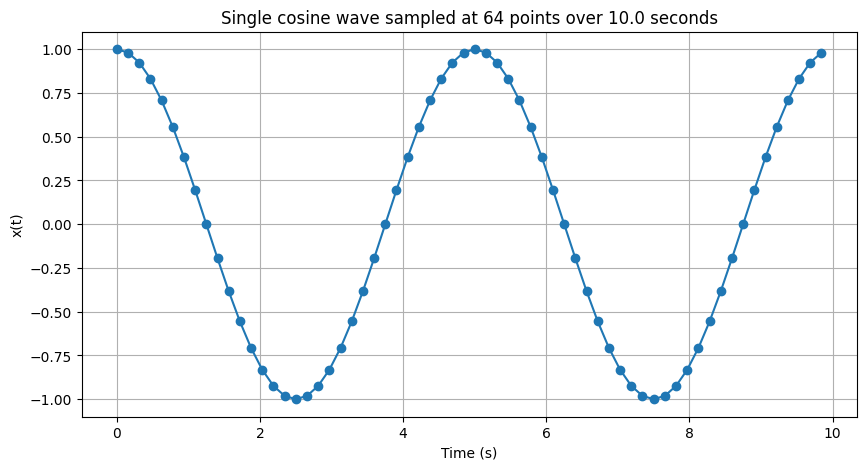

In [8]:
N = 64 # Use 64 points as requested
tau = 10.0 # time length
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds
# Choose endpoint False so that signal would fit exactly periodically within tau

f = 0.2 # frequency in Hz
x = np.cos(2*np.pi*f*t) # create x array, amplitude 1.0

plt.figure(figsize=(10, 5))
plt.plot(t, x, 'o-') # Plot x against t with points and lines
plt.title(f'Single cosine wave sampled at {N} points over {tau} seconds')
plt.xlabel('Time (s)')
plt.ylabel('x(t)')
plt.grid(True)


## Exercise 2
[2] Plot just the positive frequencies of the FFT using the `fft` routine of `numpy`. This is a plot versus point number.

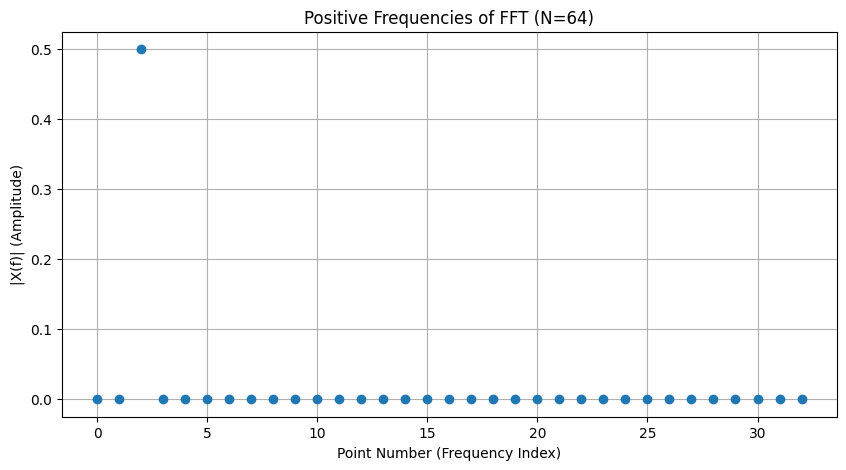

First few elements of the positive frequency FFT components:
[-1.51027238e-17+0.00000000e+00j -6.57539646e-17+2.73952480e-17j
  5.00000000e-01-1.71433198e-16j  3.15218794e-17-1.52091252e-17j
 -2.73655488e-18-5.74860405e-19j]


In [11]:
# Calculate FFT and normalize
X = fft(x) / N

# Select only the positive frequency components
# For N points, the positive frequencies are from index 0 to N//2
X_positive_freq = X[0:N//2 + 1]

plt.figure(figsize=(10, 5))
plt.plot(np.abs(X_positive_freq), 'o')
plt.title(f'Positive Frequencies of FFT (N={N})')
plt.xlabel('Point Number (Frequency Index)')
plt.ylabel('|X(f)| (Amplitude)')
plt.grid(True)
plt.show()

print("First few elements of the positive frequency FFT components:")
print(X_positive_freq[:5])

## Exercise 3

[2] For this question **and all the following**, use the `Spectrum1` function. Calculate and plot the FFT of $x$ versus frequency. (**In the rest of the exercises just plot against frequency.**) Why is the signal amplitude you find equal to 0.5 instead of 1?

 Recall: The sampling rate is $F_s = 1/\Delta t = N/\tau$. Read the section Summary above!



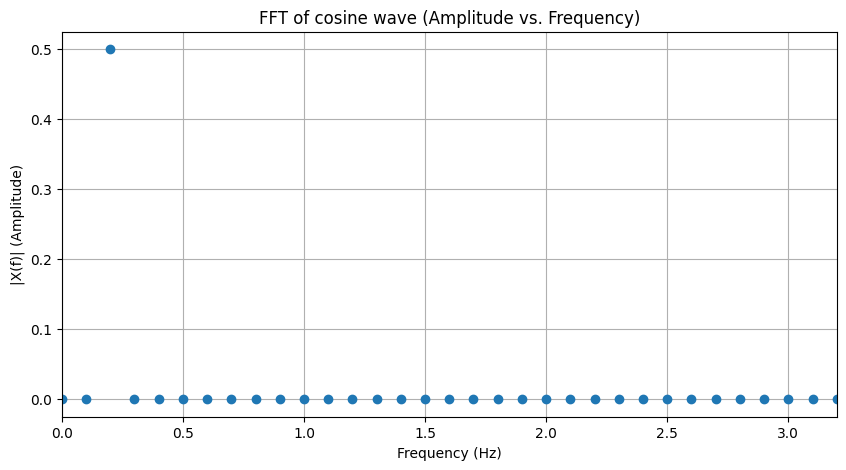

Dominant frequency found: 0.20 Hz
Corresponding amplitude: 0.50


In [13]:
# Calculate the sampling rate Fs
Fs = N / tau # N=64, tau=10.0 from previous cells

# Calculate the FFT using the Spectrum1 function
frq, X_spectrum = Spectrum1(x, Fs)

# Plot the absolute amplitude versus frequency
plt.figure(figsize=(10, 5))
plt.plot(frq, np.abs(X_spectrum), 'o')
plt.title('FFT of cosine wave (Amplitude vs. Frequency)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)| (Amplitude)')
plt.grid(True)
plt.xlim(0, Fs / 2) # Limit x-axis to positive frequencies up to Nyquist
plt.show()

print(f"Dominant frequency found: {frq[np.argmax(np.abs(X_spectrum))]:.2f} Hz")
print(f"Corresponding amplitude: {np.max(np.abs(X_spectrum)):.2f}")


## Exercise 4
[2] Show what happens if you change the frequency of the original data to 0.22 Hz instead of 0.2 Hz. _Explain what you see to the demonstrator_.
(Hint: It helps to plot both the real and imaginary parts of $X$, and to plot $\mid X \mid$.)



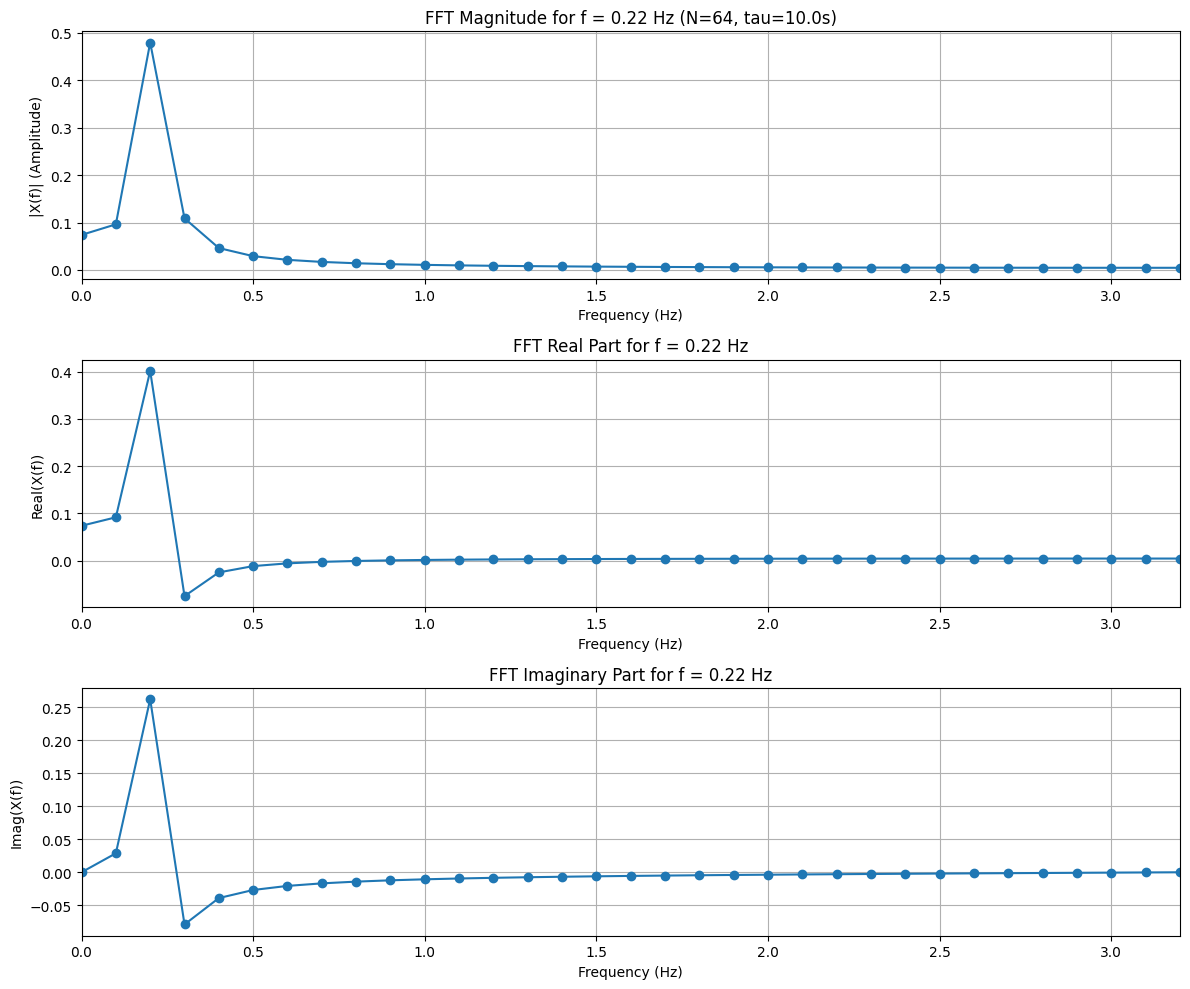

Dominant frequency index (max magnitude): 0.200 Hz
Max magnitude: 0.479


## Exercise 5

[4] (a) Investigate what happens as you sample the original data with more points,  and (b) what happens as you increase the lenght $\tau$ of the original data (for both 0.2 and 0.22 Hz).



## Exercise 6

[4] Describe what happens to the FFT if you choose non-zero phase in the cosine waves (for both 0.2 and 0.22 Hz). (Hint: Plot both the real and imaginary parts of $X$ in one graph, and $\mid X\mid$ and the argument $\arg(X)$ as a function of frequency on another graph. The function `np.angle()` will be helpful to do this.)

## Exercise 7

[4] Write a function `TestData(N, Fs)` which creates $N$ points of data containing three cosine waves with amplitudes and frequencies $a_1 = 1.0, f_1 = 12.3, a_2 = 0.5, f_2 = 7.5, a_3 = 0.2, f_3 = 30.0$. Use this function to plot the FFT for N=512, 1024 and 2048 and explain the results.

 Recall: The time separation between points is $\Delta t = 1/F_s$. Read the section Summary above!